## Basic Information

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
song_data = pd.read_csv("./data/song_data.csv")

In [3]:
song_data.shape

(18835, 15)

In [4]:
song_data.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [5]:
song_data.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [6]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


We can see through the number of unique values that there are duplicated songs in the dataset ($18335$ rows, but only $13070$ songs), so we need to  deduplicate the data first in data preprocessing. 

In [7]:
song_data.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

# Data preprocessing

We first drop duplicated rows, and then drop the column of song names, as they are not suitble features (strings) for our purpose of data analysis.

Here we notice that there are $14926$ songs remaining, while there are $13070$ songs. This may indicate different songs with the same name, so we may keep all of them.

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256      

/var/folders/xj/0mzzfw7d6t7__v00t18jd8nw0000gp/T/ipykernel_30292/1577525578.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


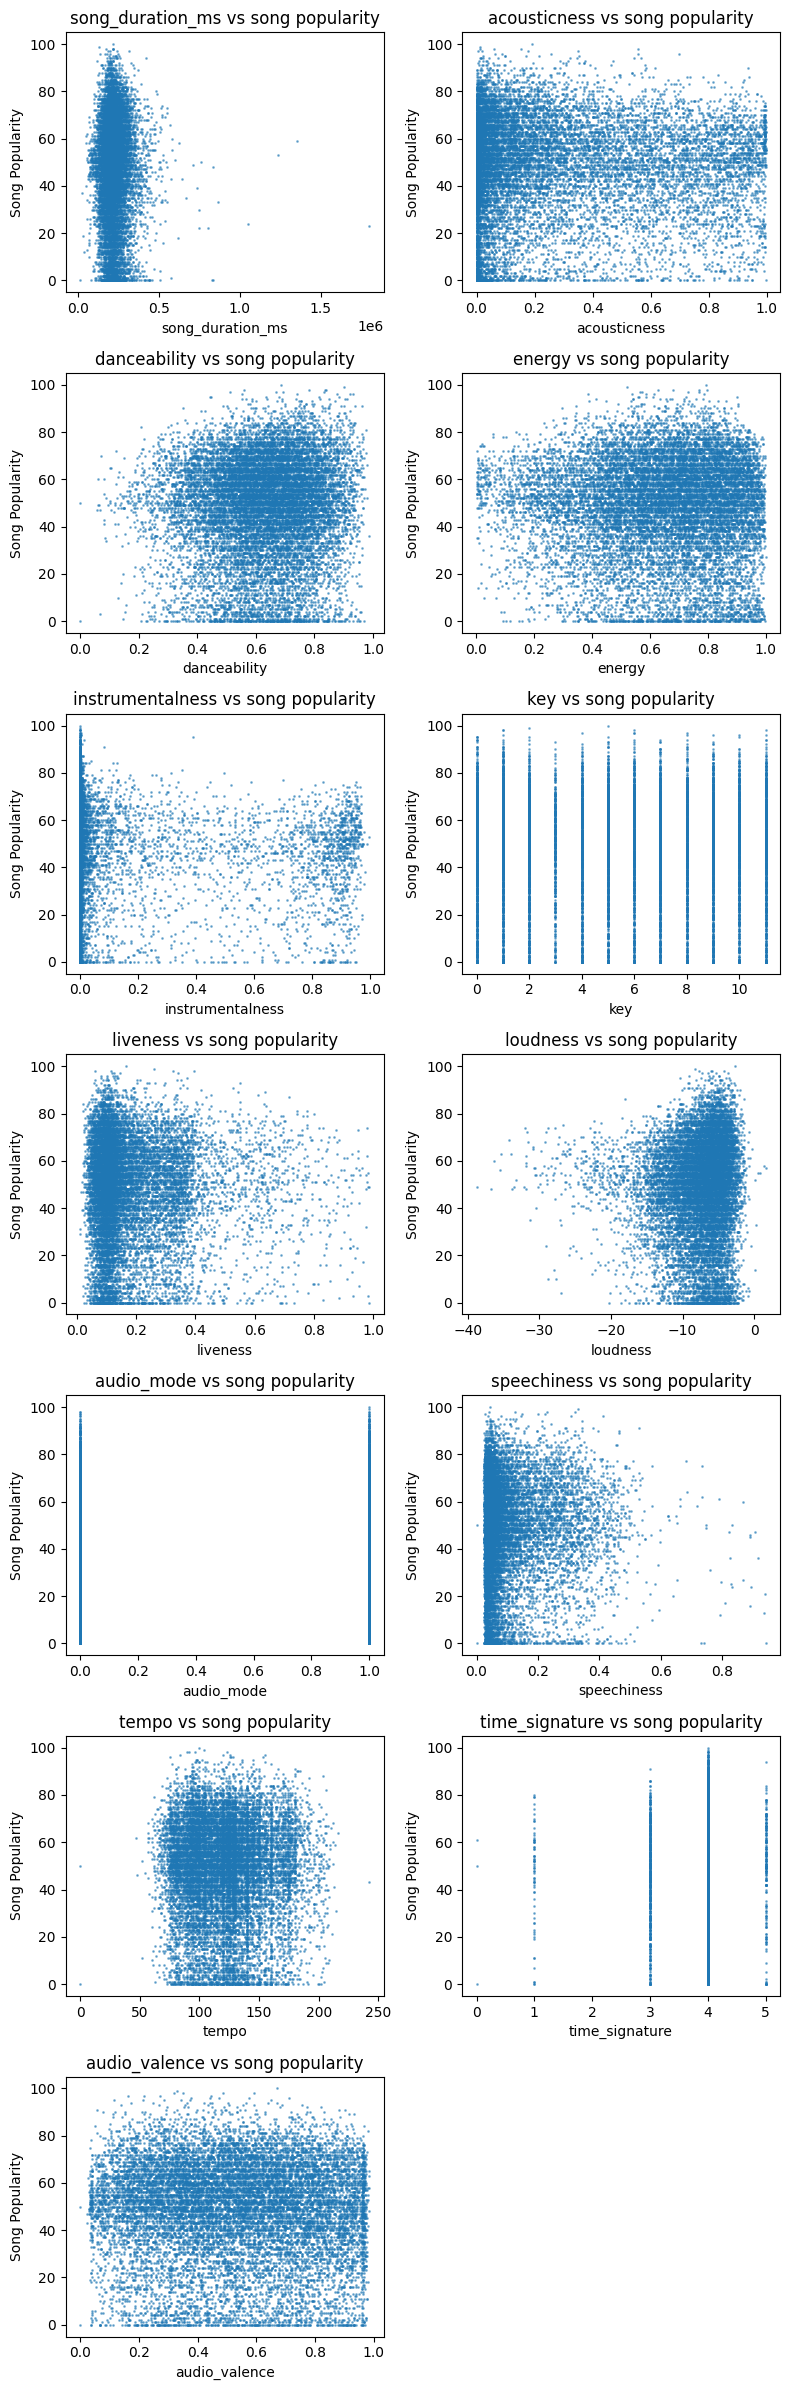

In [8]:
# Drop duplicated rows and remove the 'song_name' column
song_data = song_data.drop_duplicates().drop(columns=['song_name'])
print(song_data.head())

# Features to plot against 'song_popularity'
features = song_data.columns.drop('song_popularity')

# # Create scatter plots for each feature against 'song_popularity'
plt.figure(figsize=(8, 24))
for i, feature in enumerate(features, 1):
    plt.subplot(7, 2, i)  # Create grid of subplots
    plt.scatter(song_data[feature], song_data['song_popularity'], alpha=0.5, s=1)
    plt.title(f'{feature} vs song popularity')
    plt.xlabel(feature)
    plt.ylabel('Song Popularity')
    plt.tight_layout()

plt.show()

## Handling missing data

We can see through below that there is no missing value in all features and outcome. This means that we are free from handling missing valies.

In [9]:
song_data.isna().sum()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

## One-hot encoding

Notice that the features key, audio mode, and time signiture are categorical, meaning that the relevant magnitude of the features has no meaning to our model.

Based on the encoding result, at most one of the encoded column for each feature could be $1$. If all the columns corresponding to a column is $0$, then it means that the corresponding one-hot-encoded feature has value $0$.

In [10]:
# Features to one-hot encode
categorical_features = ['key', 'audio_mode', 'time_signature']

# Perform one-hot encoding
song_data_encoded = pd.get_dummies(song_data, columns=categorical_features, drop_first=True)

# Display the first few rows
print(song_data_encoded.head())

# Display the columns after one-hot encoding
features = song_data_encoded.columns.drop("song_popularity")
print(features)

# Overwrite song_data with its one-hot encoded version
song_data_raw = song_data
song_data = song_data_encoded

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  liveness  loudness  speechiness    tempo  ...  key_7  \
0          0.000029    0.0589    -4.095       0.0294  167.060  ...  False   
1          0.000000    0.1080    -6.407       0.0498  105.256  ...  False   
2          0.447000    0.2550    -7.828       0.0792  123.881  ...  False   
3          0.003550    0.1020    -4.938       0.1070  122.444  ...  False   
4          0.000000    0.1130    -5.065       0.0313  172.011  ...  False   

   key_8  key_9  key_10  key_11  audio_mode_1  time_signature_1  \
0   True  Fal

## Feature Selection

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

###  Correlation

First look at the correlation of each features to song popularity.

The result indicates that all features have only very weak correlation with song popularity, with at most $\approx 0.09$ in absolute value. This suggests that we might consider combination of several features to fit a better model.

Correlation of features with 'Song Popularity':
 danceability        0.056415
loudness            0.052114
key_1               0.031264
time_signature_4    0.022226
key_6               0.020305
audio_mode_1        0.008824
key_11              0.008603
key_10              0.007812
time_signature_5    0.001493
key_5              -0.000070
speechiness        -0.001971
key_8              -0.002629
key_4              -0.007740
song_duration_ms   -0.007766
time_signature_1   -0.009507
key_3              -0.010737
key_2              -0.011771
key_9              -0.015307
key_7              -0.015710
energy             -0.016468
time_signature_3   -0.023153
tempo              -0.029560
acousticness       -0.031658
liveness           -0.038553
audio_valence      -0.043963
instrumentalness   -0.093032
Name: song_popularity, dtype: float64


<Axes: >

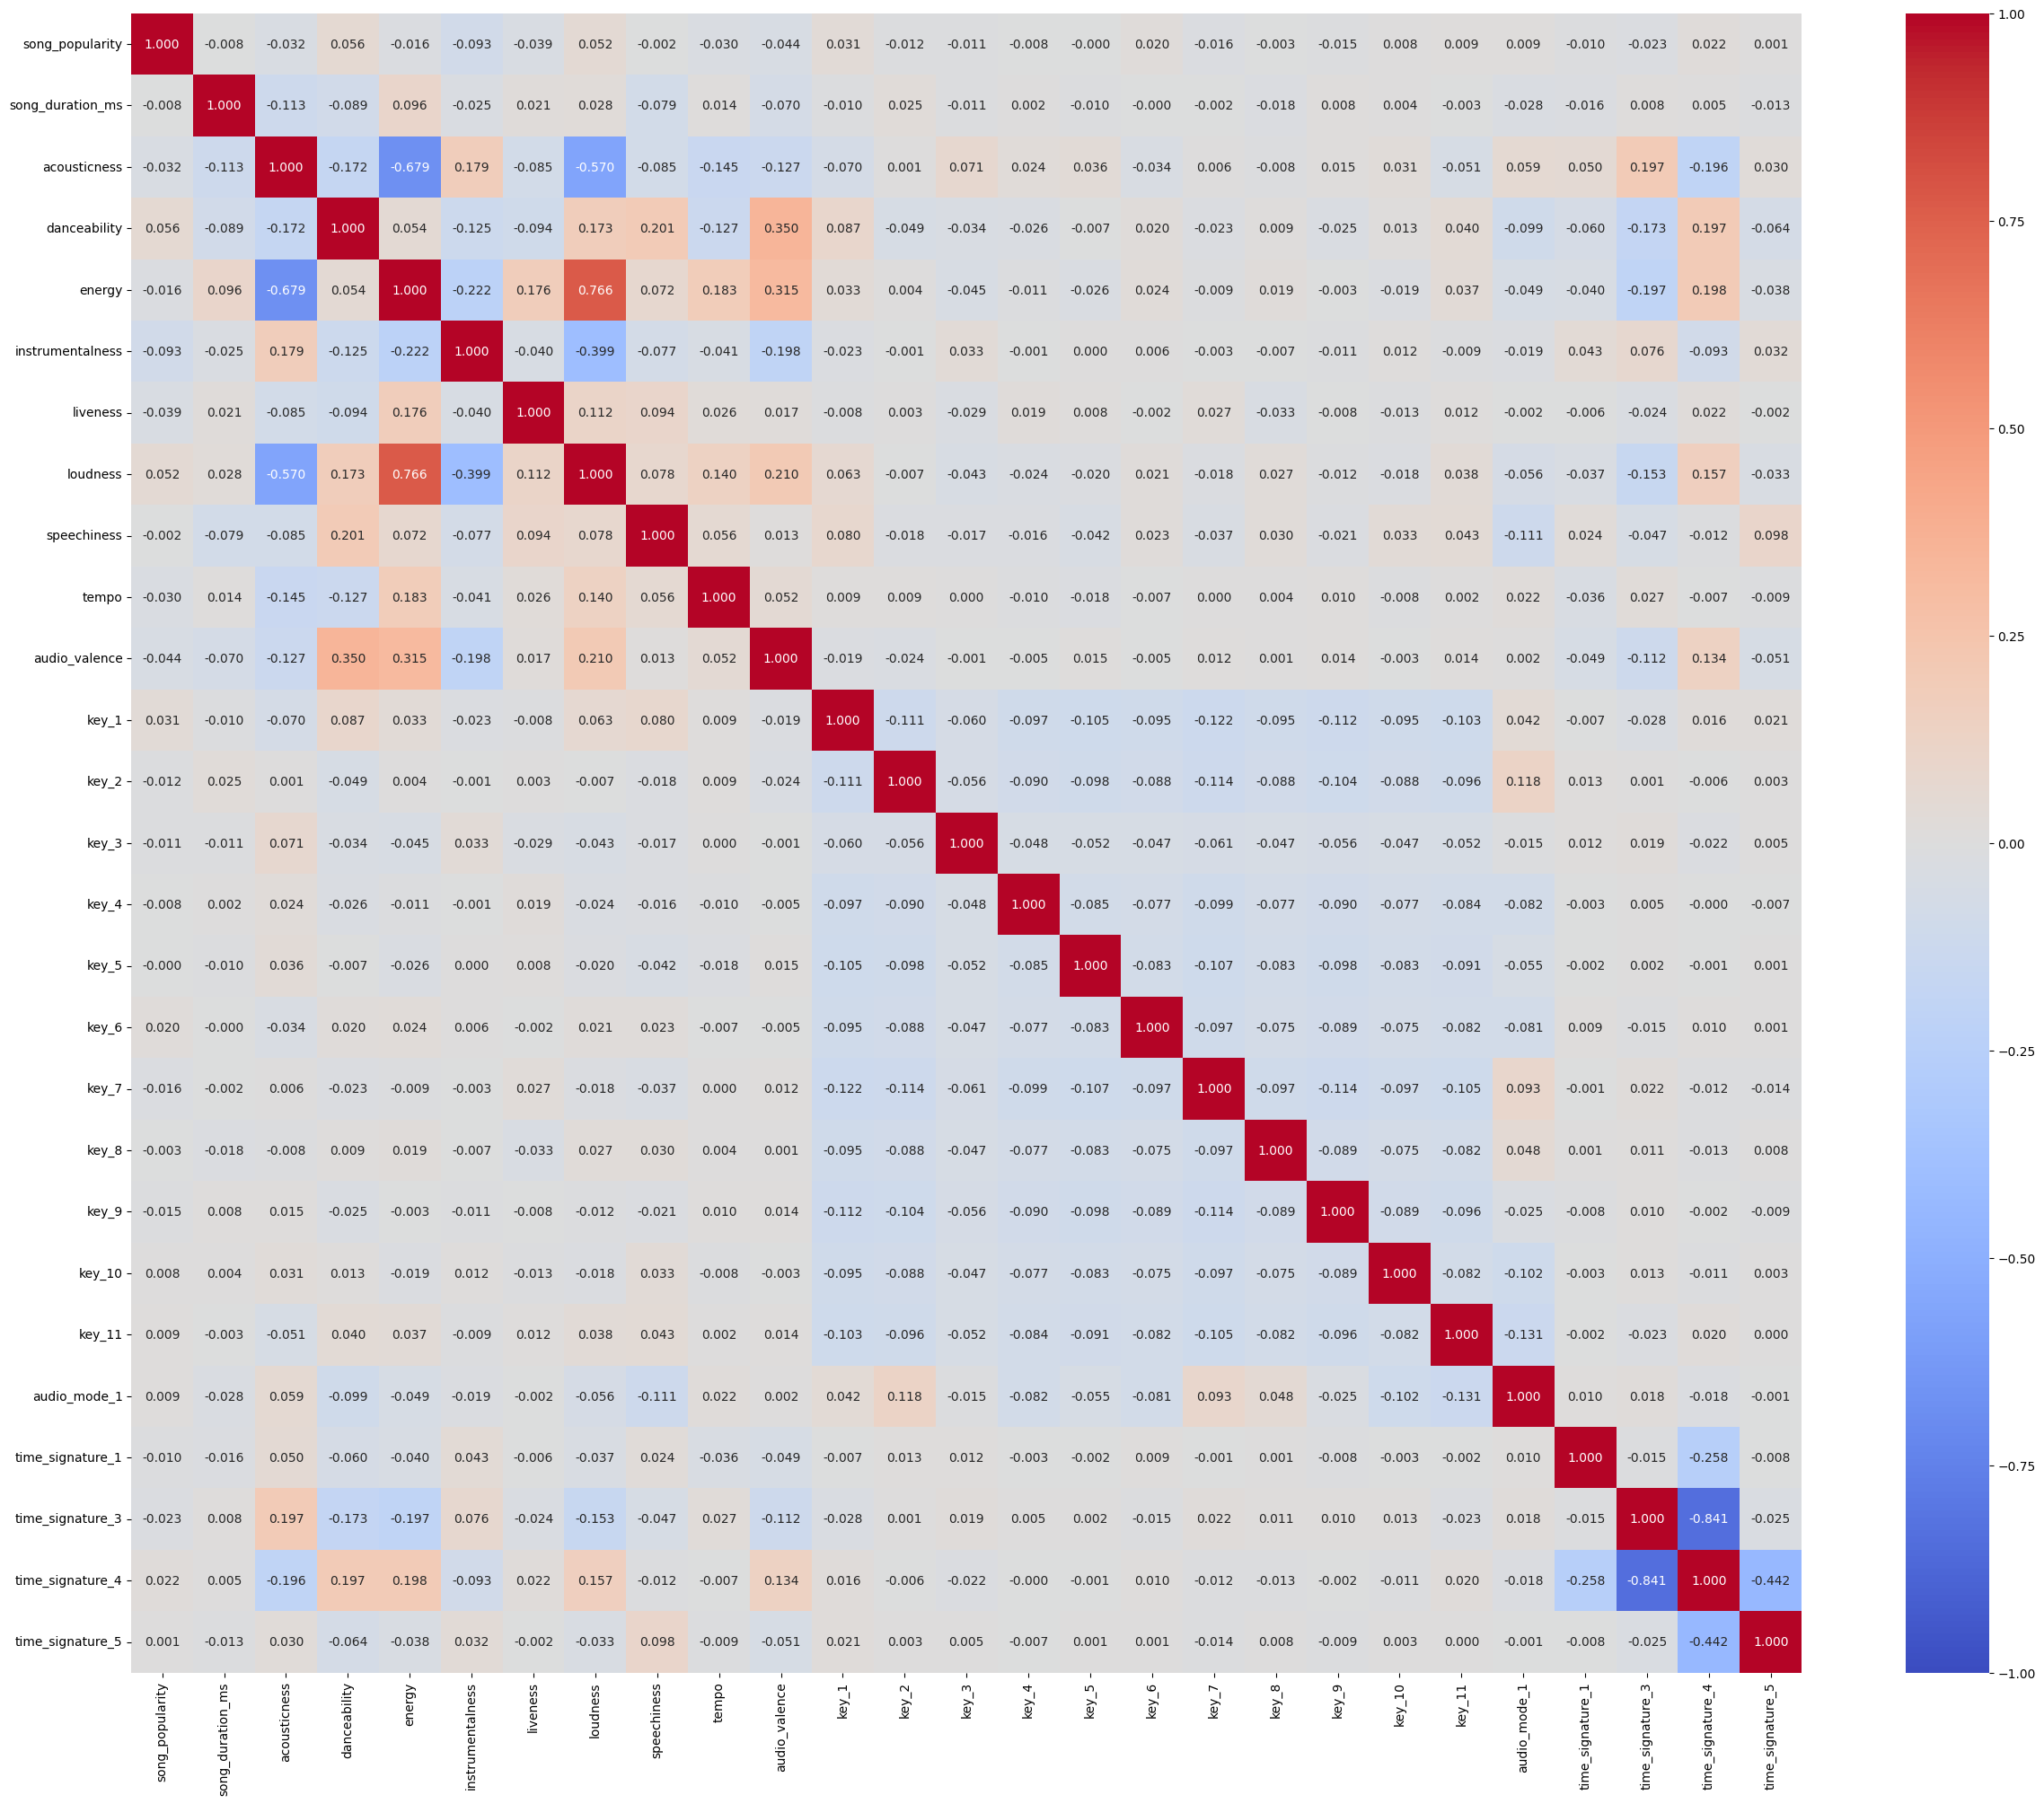

In [13]:


# Compute correlation matrix with the target variable
target_correlation = song_data.corr()['song_popularity'].sort_values(ascending=False)

# Display top correlated features
print("Correlation of features with 'Song Popularity':\n", target_correlation.drop("song_popularity"))


# Plot heatmap for all features
plt.figure(figsize=[30,24])
sns.heatmap(song_data.corr(), annot=True, vmax=1, vmin=-1, center=0, fmt=".3f", cmap="coolwarm") 

## Data Splitting and Scaling

In [14]:
def split_and_scale_data(song_data, features, target='song_popularity', test_size=0.2, random_state=1):
    """
    Splits the data into training and testing sets and scales the features.
    
    Parameters:
    song_data (DataFrame): The dataset containing features and target variable.
    features (list): List of feature column names.
    target (str): The target variable column name. Default is 'song_popularity'.
    test_size (float): The proportion of the dataset to include in the test split. Default is 0.2.
    random_state (int): Random seed for reproducibility. Default is 1.
    
    Returns:
    tuple: Scaled training and testing features, and training and testing target variables.
    """
    
    # Splitting the data
    X = song_data[features]
    y = song_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [15]:

X_train_scaled, X_test_scaled, y_train, y_test = split_and_scale_data(song_data, features, random_state=2024)
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_scaled shape: (11940, 26)
X_test_scaled shape: (2986, 26)
y_train shape: (11940,)
y_test shape: (2986,)


## Machine Learning Models

In [16]:
def evaluate_model(y_test, y_pred, model_name):
    """
    Evaluate the performance of a regression model using various metrics.
    Parameters:
    y_test (array-like): True values of the target variable.
    y_pred (array-like): Predicted values of the target variable.
    model_name (str): Name of the model being evaluated.
    Returns:
    tuple: A tuple containing the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), 
           and R-squared value (R^2) of the model.
    """

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared Value (R^2): {r2:.2f}")
    print("\n")
    
    return mse, rmse, r2

In [17]:
def plot_hyperparameter_tuning_results(grid_search, title):
    """
    Visualize hyperparameter tuning results from a GridSearchCV object.
    Parameters:
    grid_search (GridSearchCV): The GridSearchCV object containing the results of the hyperparameter tuning.
    title (str): The title for the plot.
    Returns:
    None: This function does not return any value. It displays a plot of the hyperparameter tuning results.
    """

    # Visualize hyperparameter tuning results
    plt.figure(figsize=(8, 6))
    alphas = grid_search.cv_results_['param_alpha'].data.astype(float)
    mean_test_scores = -grid_search.cv_results_['mean_test_score']  # Convert negative MSE back to positive
    plt.plot(alphas, mean_test_scores, marker='o', label='Validation MSE', color='purple', markersize=4.5)
    plt.xscale('log')
    plt.xlabel("Alpha")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title(f"Hyperparameter Tuning: {title}")
    plt.legend()
    plt.grid(axis='y')
    plt.show()

In [18]:


def plot_model_results(y_test, y_pred, model, title):
    """
    Plots the results of a regression model including actual vs predicted values, residuals, and feature coefficients.
    Parameters:
    y_test (array-like): Actual values of the target variable.
    y_pred (array-like): Predicted values of the target variable by the model.
    model (object): Trained regression model with a `coef_` attribute.
    title (str): Title for the plots.
    Returns:
    None. This function does not return any value. It displays two plots. The first one is the plot for actual vs predicted values, and the second one for residuals vs predicted values.
    """

    # Plot actual vs predicted values of song popularity
    plt.figure(figsize=(6, 4.5))
    plt.scatter(y_test, y_pred, alpha=0.5, s=10)
    # plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="y_test = y_pred")
    plt.xlabel("Actual Song Popularity")
    plt.ylabel("Predicted Song Popularity")
    plt.title(f"{title}: Actual vs Predicted Song Popularity")
    # plt.grid(True)
    # plt.legend()
    plt.show()

    # Plot residuals against predicted song popularity
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4.5))
    plt.scatter(y_pred, residuals, alpha=0.5, s=10)
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Residue')
    plt.xlabel("Predicted Song Popularity")
    plt.ylabel("Residuals")
    plt.title(f"{title}: Residuals vs Predicted Song Popularity")
    # plt.grid(True)
    plt.legend()
    plt.show()

def plot_parameter_values(model, features, title):
    """
    Plots the parameter values (coefficients) of a given model.
    Parameters:
    model (object): The trained model with a `coef_` attribute.
    features (list of str): The list of feature names corresponding to the coefficients.
    title (str): The title for the plot.
    Returns:
    None
    """


    # Plot parameter values (coefficients)
    coefficients = model.coef_

    plt.figure(figsize=(10, 8))
    plt.barh(features, coefficients, color='teal')
    plt.axvline(x=0, color='r', linestyle='--')  # Line at zero
    plt.xlabel("Values of Coefficients")
    plt.ylabel("Features")
    plt.title(f"{title}: Feature Coefficients")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.grid(axis='x')
    plt.show()

### Linear Regression

In [19]:
# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on training set
model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred, "Linear Regression")
print(f"Incercept Value: {model.intercept_:.2f}")

Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 415.65
Root Mean Squared Error (RMSE): 20.39
R-squared Value (R^2): 0.02


Incercept Value: 48.85


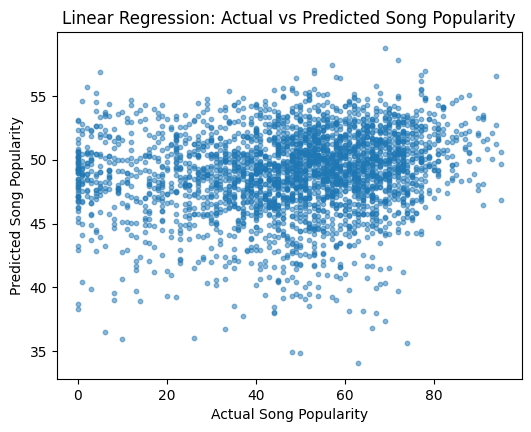

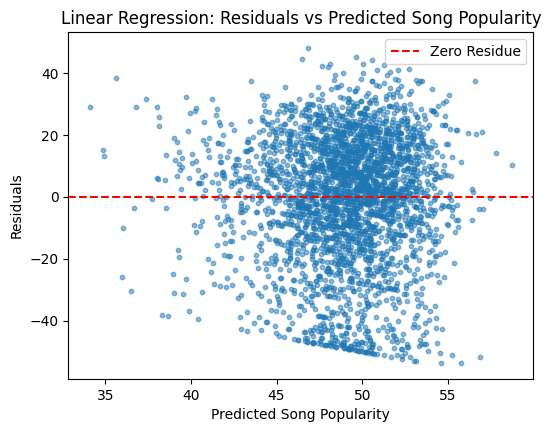

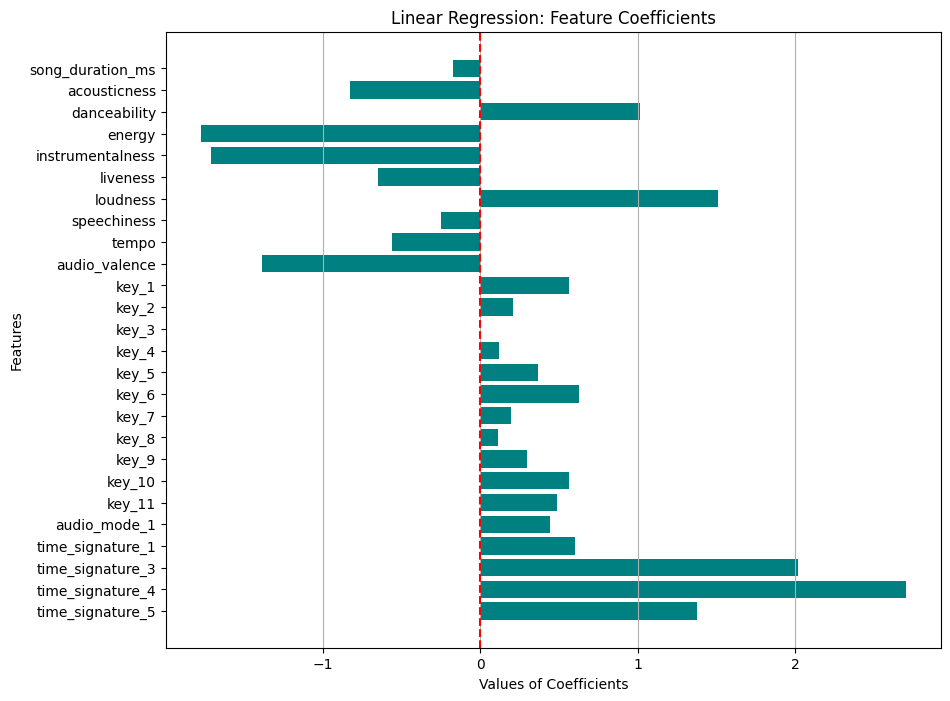

In [20]:
plot_model_results(y_test, y_pred, model, "Linear Regression")
plot_parameter_values(model, features, "Linear Regression")

### Ridge Regression

Here we minimize the function $||y - Xw||^2_2 + \alpha ||w||^2_2$, where $\alpha$ is a hyperparameter we need to tune by searching from $10^{-2} = 0.01$ to $10^{3.3} \approx 2000$ in log scale.

To find the best hyperparameter, we use $5$-fold cross validation.

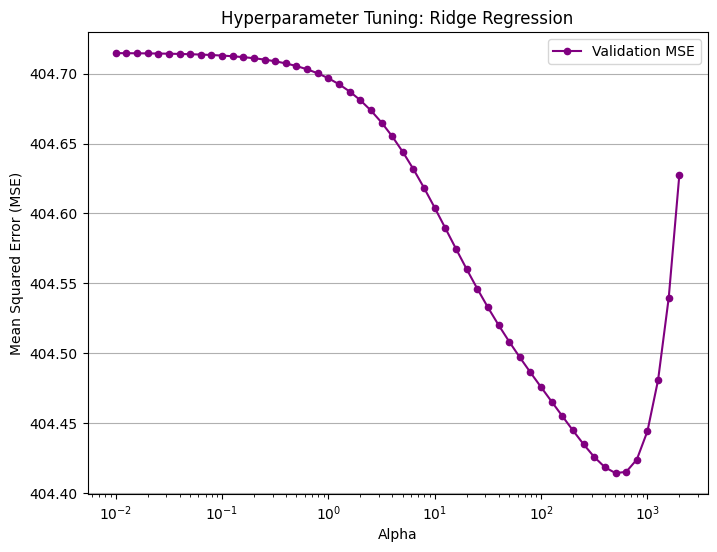

In [21]:
# Define Ridge Regression model and the range of hyperparameters (alpha values)
ridge = Ridge()
param_grid = {'alpha': np.logspace(-2, 3.3, 54)}  # alpha values from 0.01 to 10^3.3 \approx 2000

# Find the best hyperparameter
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Visualize hyperparameter tuning results
plot_hyperparameter_tuning_results(grid_search, "Ridge Regression")


We can see through the result below that the best hyperparameter is $\hat{\alpha} \approx 500$. Though the small $R^2$ indicate that the fitting is ineffective.

In [22]:
# Get the best model through hyperparameter
ridge_est = grid_search.best_estimator_
alpha_est = grid_search.best_params_['alpha']

print(f"Best alpha: {alpha_est:.4f}")
print(f"Best cross-validated score (negative of MSE): {grid_search.best_score_:.2f}")


# Evaluate the model on the test data
y_pred_ridge = ridge_est.predict(X_test_scaled)
mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
print(f"Incercept Value: {ridge_est.intercept_:.2f}")

Best alpha: 501.1872
Best cross-validated score (negative of MSE): -404.41
Ridge Regression Evaluation Metrics:
Mean Squared Error (MSE): 415.63
Root Mean Squared Error (RMSE): 20.39
R-squared Value (R^2): 0.02


Incercept Value: 48.85


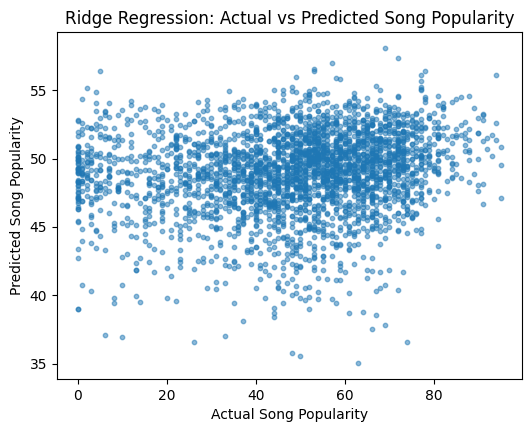

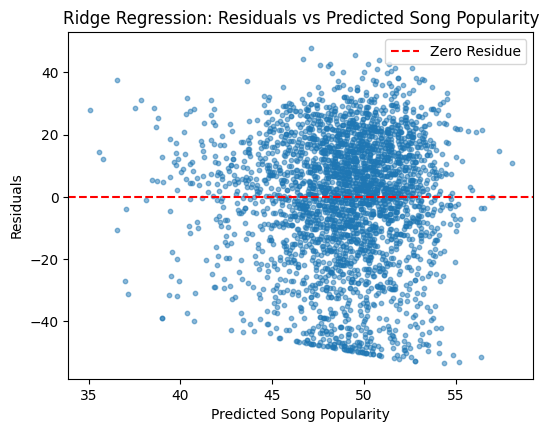

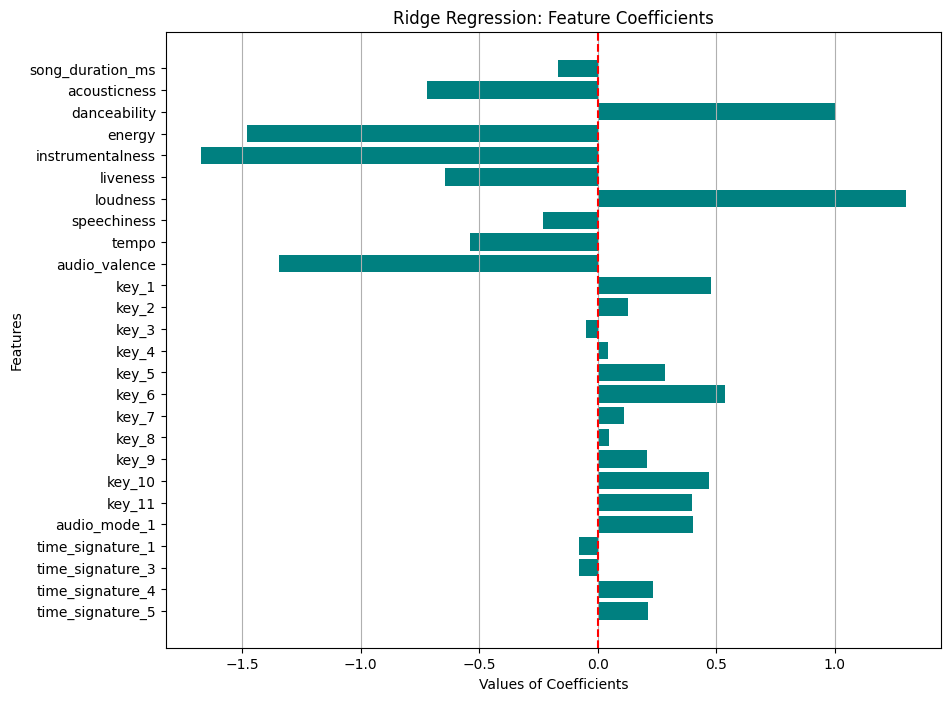

In [23]:
# Plot actual vs predicted values of song popularity
plot_model_results(y_test, y_pred_ridge, ridge_est, "Ridge Regression")

# Plot parameter values (coefficients) of Ridge Regression
plot_parameter_values(ridge_est, features, "Ridge Regression")


### LASSO Regression

Here we minimize the function $\frac{1}{2N} ||y - Xw||^2_2 + \alpha * ||w||_1$, where $N$ is the number of smaples, and $\alpha$ is a hyperparameter we need to tune by searching from $10^{-4}$ to $10$ in log scale. Note that the scale of $\alpha$ could be different with that in Ridge Regression.

To find the best hyperparameter, we use $5$-fold cross validation.

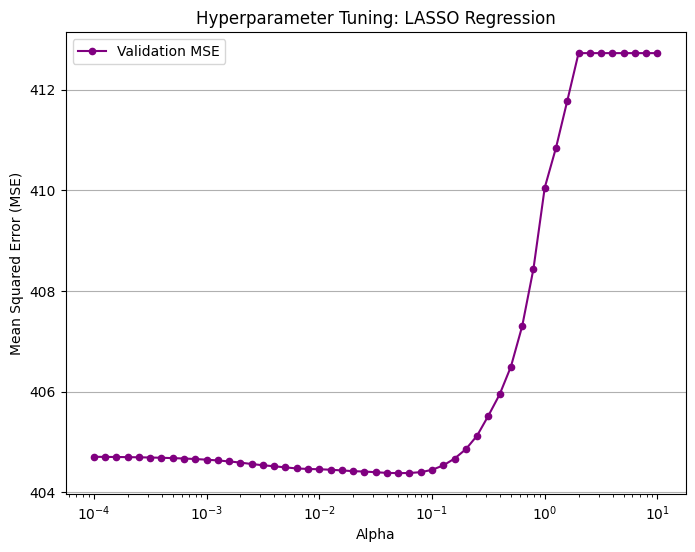

In [24]:
# Define the Lasso Regression model and the range of hyperparameters (alpha values) for tuning
lasso = Lasso(max_iter=20000)

param_grid = {'alpha': np.logspace(-4, 1, 51)}  # alpha values from 0.001 to 10

# Find the best hyperparameter for LASSO
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Visualize hyperparameter tuning results
plot_hyperparameter_tuning_results(grid_search, "LASSO Regression")


We can see through the result below that the best hyperparameter is $\hat{\alpha} \approx 0.05$. Though the small $R^2$ indicate that the fitting is ineffective.

In [25]:
# Get the best LASSO model and hyperparameter
lasso_est = grid_search.best_estimator_
alpha_est = grid_search.best_params_['alpha']

print(f"Best alpha: {alpha_est:.4f}")
print(f"Best cross-validated score (negative MSE): {grid_search.best_score_:.2f}")

# Evaluate the model on the test data
y_pred_lasso = lasso_est.predict(X_test_scaled)
mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso, "LASSO Regression")
print(f"Incercept Value: {lasso_est.intercept_:.2f}")

Best alpha: 0.0501
Best cross-validated score (negative MSE): -404.38
LASSO Regression Evaluation Metrics:
Mean Squared Error (MSE): 415.08
Root Mean Squared Error (RMSE): 20.37
R-squared Value (R^2): 0.02


Incercept Value: 48.85


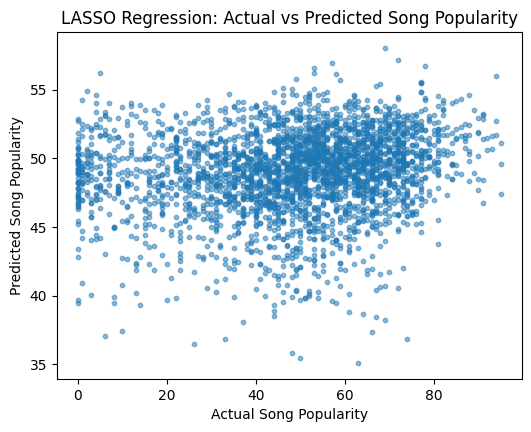

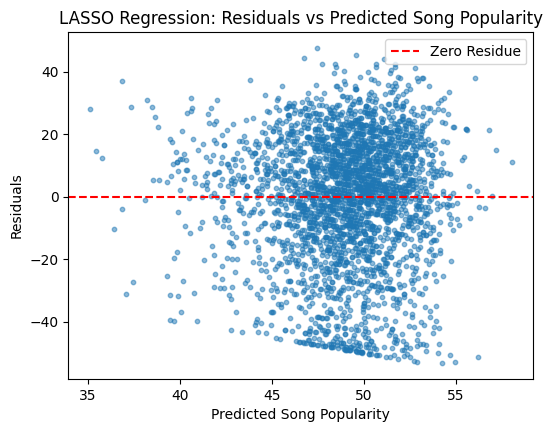

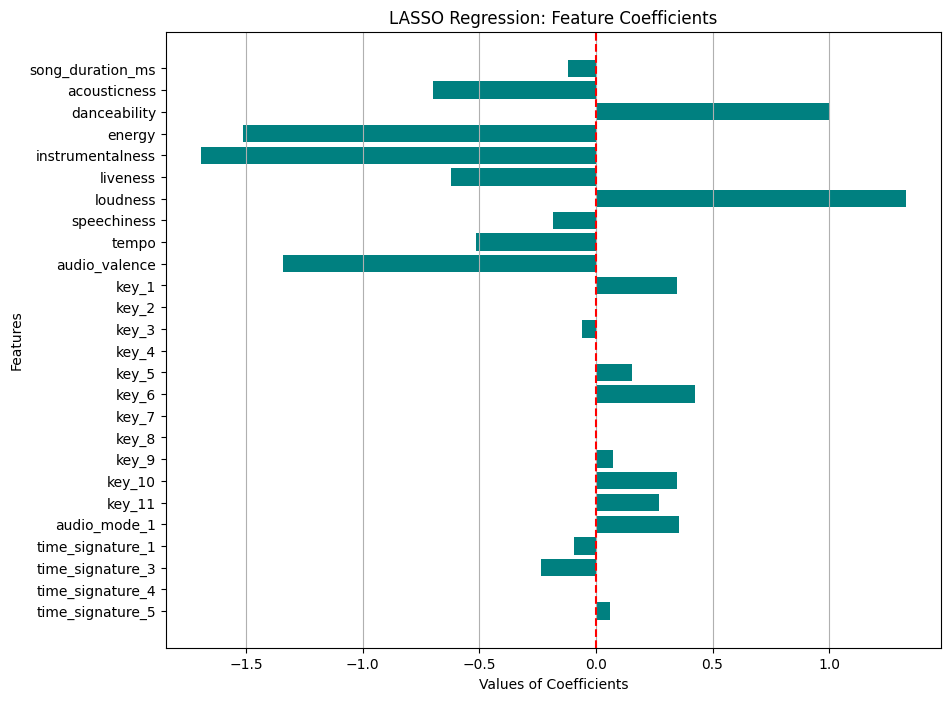

In [26]:
# Plot actual vs predicted values of song popularity
plot_model_results(y_test, y_pred_lasso, lasso_est, "LASSO Regression")

# Plot parameter values (coefficients) of LASSO Regression
plot_parameter_values(lasso_est, features, "LASSO Regression")


## Random Forest Regression

In [27]:
# from sklearn.ensemble import RandomForestRegressor

# Step 1: Define the Random Forest Regression model
rf = RandomForestRegressor(random_state=42)

# Step 2: Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples per leaf node
}
print("Step 2 done")
# Step 3: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train_scaled, y_train)
print("Step 3 done")

Step 2 done
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s


KeyboardInterrupt: 

In [ ]:
# Step 4: Get the best model and hyperparameters
rf_est = grid_search.best_estimator_

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validated score (negative MSE): {grid_search.best_score_:.2f}")

# Step 5: Evaluate the model on the test data
y_pred_rf = rf_est.predict(X_test_scaled)
mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated score (negative MSE): -393.16
Step 4 done
Test Set Mean Squared Error (MSE): 388.36
Test Set Root Mean Squared Error (RMSE): 19.71
Test Set R-squared Value (R^2): 0.05
Step 5 done


We can see that there are boosts in performance for the nonlinear random forest regression model, but the prediction power is still limited.

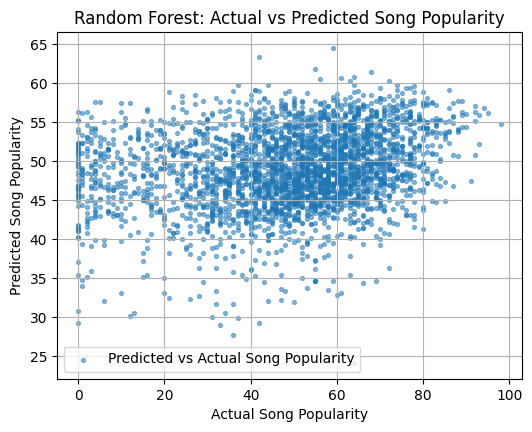

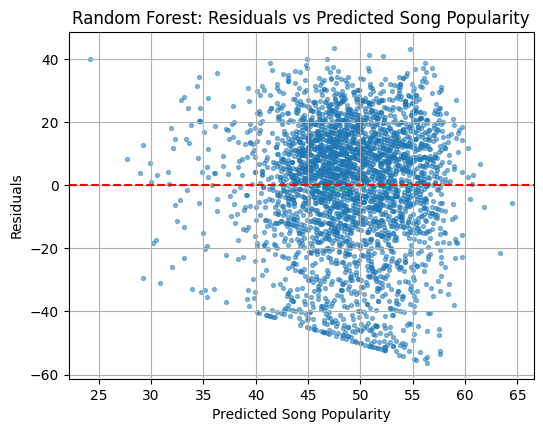

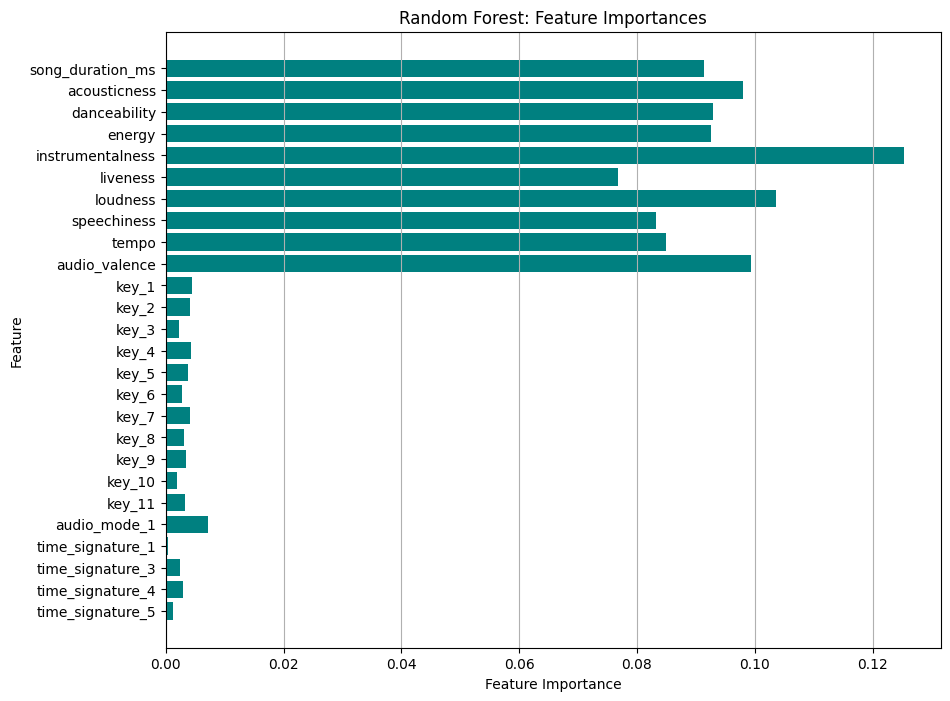

In [ ]:
# Step 6: Plot actual vs predicted values and Residuals
plot_model_results(y_test, y_pred_rf, rf_est, "Random Forest")

# Step 7: Feature Importance Plot
importances = rf_est.feature_importances_
# features = X.columns  # Feature names

plt.figure(figsize=(10, 8))
# sorted_idx = np.argsort(importances)[::-1]  # Sort features by importance
# plt.barh(np.array(features)[sorted_idx], importances[sorted_idx], color='skyblue')
plt.barh(np.array(features), importances, color="teal")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest: Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis = 'x')
plt.show()

### Neural Network

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [30]:
# Define of the Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Epoch 250/1500, Train Loss: 416.8473, Test Loss: 433.8362
Epoch 500/1500, Train Loss: 395.5610, Test Loss: 417.5271
Epoch 750/1500, Train Loss: 388.7902, Test Loss: 415.0293
Epoch 1000/1500, Train Loss: 385.0334, Test Loss: 414.6246
Epoch 1250/1500, Train Loss: 380.9232, Test Loss: 415.5676
Epoch 1500/1500, Train Loss: 376.3608, Test Loss: 417.1013


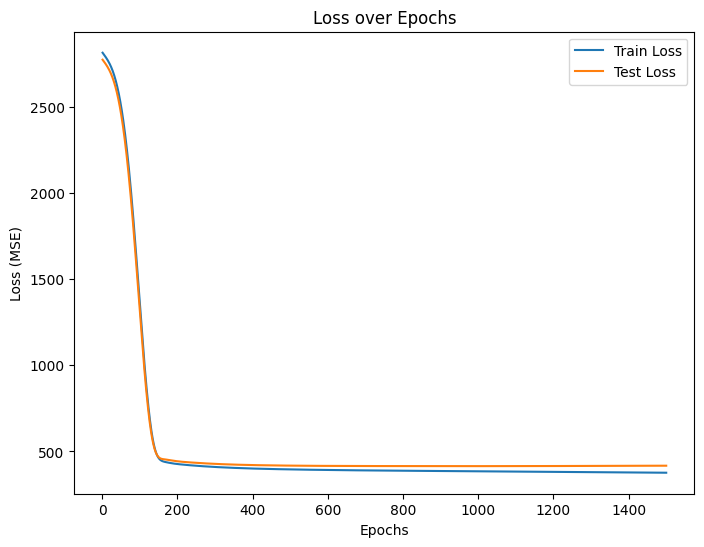

In [31]:
# Model, Loss, Optimizer
input_size = X_train_tensor.shape[1]
model = NeuralNet(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 1500
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    train_loss = criterion(y_pred, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    
    # Evaluation phase
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
    
    # Record losses
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    # Print progress
    if (epoch + 1) % 250 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Visualization of loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Epochs')
plt.legend()
# plt.grid(True)
plt.show()

Neural Network Evaluation Metrics:
Mean Squared Error (MSE): 417.10
Root Mean Squared Error (RMSE): 20.42
R-squared Value (R^2): 0.02




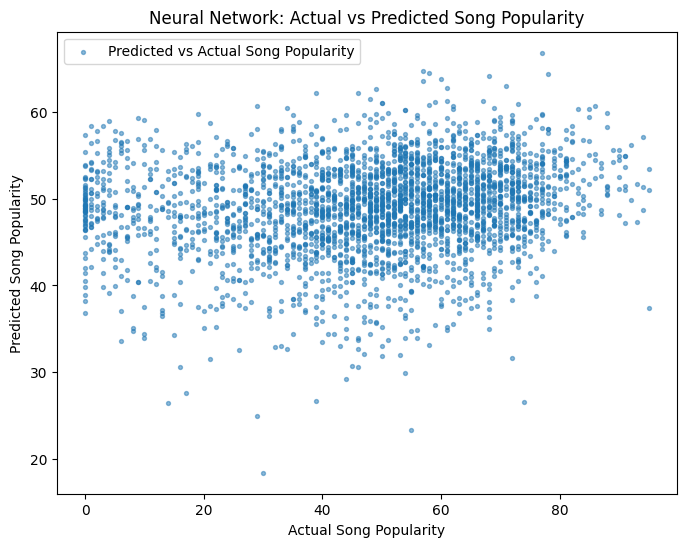

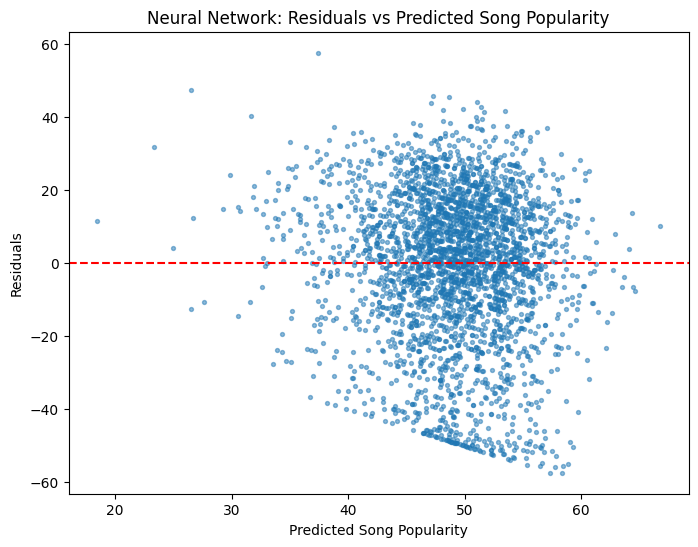

In [32]:
# Evaluation on Test Set
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor).numpy()

# Example usage for Neural Network
mse_nn, rmse_nn, r2_nn = evaluate_model(y_test, y_pred_nn, "Neural Network")


# plot_model_results(y_test, y_pred_nn.flatten(), model, X, "Neural Network")

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5, s=8, label="Predicted vs Actual Song Popularity")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="y = x")
plt.xlabel("Actual Song Popularity")
plt.ylabel("Predicted Song Popularity")
plt.title("Neural Network: Actual vs Predicted Song Popularity")
plt.legend()
# plt.grid(True)
plt.show()

# Residual Plot
residuals_nn = y_test - y_pred_nn.flatten()
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_nn, residuals_nn, alpha=0.5, s=8)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Song Popularity")
plt.ylabel("Residuals")
plt.title("Neural Network: Residuals vs Predicted Song Popularity")
# plt.grid(True)
plt.show()

## Model Selection

### Plotting metrics

In [33]:
# Define model metrics
model_metrics = {
    "Model": ["Linear Reg.", "Ridge Reg.", "LASSO", "Random Forest", "Neural Net"],
    "MSE": [mse_lr, mse_ridge, mse_lasso, mse_rf, mse_nn],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso, rmse_rf, rmse_nn],
    "R^2": [r2_lr, r2_ridge, r2_lasso, r2_rf, r2_nn]
}

# Convert to a DataFrame for better visualization
metrics_df = pd.DataFrame(model_metrics)

# Plot the metrics
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# Plot MSE
axes[0].bar(metrics_df["Model"], metrics_df["MSE"], color="skyblue")
axes[0].set_title("Model Comparison: MSE")
axes[0].set_ylabel("MSE")
# axes[0].grid(axis='y')

# Plot RMSE
axes[1].bar(metrics_df["Model"], metrics_df["RMSE"], color="orange")
axes[1].set_title("Model Comparison: RMSE")
axes[1].set_ylabel("RMSE")
# axes[1].grid(axis='y')

# Plot R^2
axes[2].bar(metrics_df["Model"], metrics_df["R^2"], color="green")
axes[2].set_title("Model Comparison: R^2")
axes[2].set_ylabel("R^2")
# axes[2].grid(axis='y')

plt.tight_layout()
plt.show()



NameError: name 'mse_rf' is not defined

### Model Selection

In [ ]:
# Model Selection
# Select the best model based on RMSE (lower is better)
best_model_idx = metrics_df["RMSE"].idxmin()
best_model_name = metrics_df.loc[best_model_idx, "Model"]
best_model_rmse = metrics_df.loc[best_model_idx, "RMSE"]

print(f"The best model based on RMSE is: {best_model_name}")
print(f"RMSE of the best model: {best_model_rmse:.2f}")

# Alternatively, you can select based on R^2 (higher is better)
best_model_idx_r2 = metrics_df["R^2"].idxmax()
best_model_name_r2 = metrics_df.loc[best_model_idx_r2, "Model"]
best_model_r2 = metrics_df.loc[best_model_idx_r2, "R^2"]

print(f"The best model based on R^2 is: {best_model_name_r2}")
print(f"R^2 of the best model: {best_model_r2:.2f}")


The best model based on RMSE is: Random Forest
RMSE of the best model: 19.71
The best model based on R^2 is: Random Forest
R^2 of the best model: 0.05


## Hypothesis testing

In [39]:
from scipy.stats import f_oneway, ttest_ind
import scipy.stats as stats

# Function for t-tests (binary categorical variable)
def t_test(df, cat_feature, num_feature):
    """
    Perform Welch's t-test on a numerical feature grouped by a binary categorical feature.
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    cat_feature (str): The name of the categorical feature to group by.
    num_feature (str): The name of the numerical feature to test.
    Returns:
    dict: A dictionary containing the t-statistic and p-value if the categorical feature is binary.
    None: If the categorical feature is not binary.
    """

    groups = df.groupby(cat_feature)[num_feature]
    if len(groups) == 2:  # Ensure binary categories
        group1, group2 = groups
        t_stat, p_value = stats.ttest_ind(group1[1], group2[1], equal_var=False)  # Welch's t-test
#         print(f"T-test for {num_feature} by {cat_feature}:")
#         print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}\n")
        return {"statistic": t_stat, "p_value": p_value}
    else:
        print(f"{cat_feature} is not binary. Skipping t-test.\n")
        return None

# Function for ANOVA (multi-category categorical variable)
def anova_test(df, cat_feature, num_feature):
    """
    Perform an ANOVA test to determine if there are significant differences 
    between the means of a numerical feature across different categories of a categorical feature.
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    cat_feature (str): The name of the categorical feature.
    num_feature (str): The name of the numerical feature.
    Returns:
    dict: A dictionary containing the F-statistic and the p-value of the ANOVA test.
    """
    groups = [group for _, group in df.groupby(cat_feature)[num_feature]]
    f_stat, p_value = stats.f_oneway(*groups)
#     print(f"ANOVA for {num_feature} by {cat_feature}:")
#     print(f"F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}\n")
    return {"statistic": f_stat, "p_value": p_value}


In [ ]:
def plot_tests(df, categorical_features, numerical_features):
    """
    Perform statistical tests between categorical and numerical features and plot the results.
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    categorical_features (list of str): List of names of categorical features.
    numerical_features (list of str): List of names of numerical features.
    Returns:
    None: This function does not return any value. It prints the significant numerical features for each categorical feature and plots the test statistics and p-values.
    The function performs t-tests or ANOVA tests depending on the number of unique values in the categorical feature.
    If the categorical feature has 2 unique values, a t-test is performed.
    If the categorical feature has more than 2 unique values, an ANOVA test is performed.
    The results of the tests are plotted:
    - The first plot shows the test statistics (t-statistic or F-statistic) for each numerical feature.
    - The second plot shows the p-values in log scale (-log10(p-value)) for each numerical feature.
    - Significant p-values (p < alpha) are marked with an asterisk (*) in the p-value plot.
    Note:
    - The function assumes the existence of `t_test` and `anova_test` functions that return a dictionary with keys "statistic" and "p_value".
    - The significance level (alpha) is set to 0.05.
    """
    
    alpha = 0.05
    results = []

    for cat_feature in categorical_features:
        for num_feature in numerical_features:
            if df[cat_feature].nunique() == 2:
                test_result = t_test(df, cat_feature, num_feature)
            else:
                test_result = anova_test(df, cat_feature, num_feature)

            if test_result is not None:
                results.append({
                    "cat_feat": cat_feature,
                    "num_feat": num_feature,
                    "statistic": test_result["statistic"],
                    "p_value": test_result["p_value"]
                })

    # Convert results to DataFrame for plotting
    results_df = pd.DataFrame(results)
    

    # Plotting the results and finding significant features
    for cat_feature in categorical_features:
        cat_result = results_df[results_df["cat_feat"] == cat_feature]
        sig_features = cat_result[cat_result["p_value"] < alpha]
        
        print(f"Significant numerical features for categorical feature '{cat_feature}' (p < {alpha}) are:")
        if sig_features.empty:
            print("  None\n")
        else:
            for _, row in sig_features.iterrows():
                print(f"  {row['num_feat']}: p-value: {row['p_value']}, statistic: {row['statistic']:.4f}")

        if not cat_result.empty:
            fig, axes = plt.subplots(2, 1, figsize=(6, 10))

            # Plot test statistics (normal scale)
            axes[0].bar(cat_result["num_feat"], cat_result["statistic"], color="blue")
            axes[0].set_title(f"Statistics by Numerical Features ({cat_feature})")
            axes[0].set_ylabel("Statistic Value (t-statistic or F-statistic)")
            axes[0].tick_params(axis='x', rotation=45)
#             axes[0].grid(True, axis='y')

            # Plot p-values (log scale)
            log_p_values = -np.log10(cat_result["p_value"])
            axes[1].bar(cat_result["num_feat"], log_p_values, color="orange")
            axes[1].set_title(f"Negative log of p-values by Numerical Features ({cat_feature})")
            axes[1].set_ylabel("-log10(p-value)")
            
            axes[1].tick_params(axis='x', rotation=45)
#             axes[1].grid(True, axis='y')
            
            for i, (num_feature, p_value) in enumerate(zip(cat_result["num_feat"], cat_result["p_value"])):
                if p_value < alpha:
                    axes[1].text(i, -np.log10(p_value), "*", ha="center", va="bottom", fontsize=10)
                    # '*' stands for statistical significance

            plt.tight_layout()
            plt.show()

Significant numerical features for categorical feature 'key' (p < 0.05) are:
  song_popularity: p-value: 0.0007664384070086642, statistic: 2.9101
  song_duration_ms: p-value: 0.04762878401187251, statistic: 1.8040
  acousticness: p-value: 2.255450127717044e-44, statistic: 21.6281
  danceability: p-value: 6.847553851679949e-39, statistic: 19.2019
  energy: p-value: 3.304353100143194e-16, statistic: 8.9951
  instrumentalness: p-value: 0.00027772887535511644, statistic: 3.1572
  liveness: p-value: 1.1861793760782406e-06, statistic: 4.4105
  loudness: p-value: 2.9156376450129026e-26, statistic: 13.5700
  speechiness: p-value: 5.2889461820365144e-46, statistic: 22.3480
  audio_valence: p-value: 0.016447402895504393, statistic: 2.1120


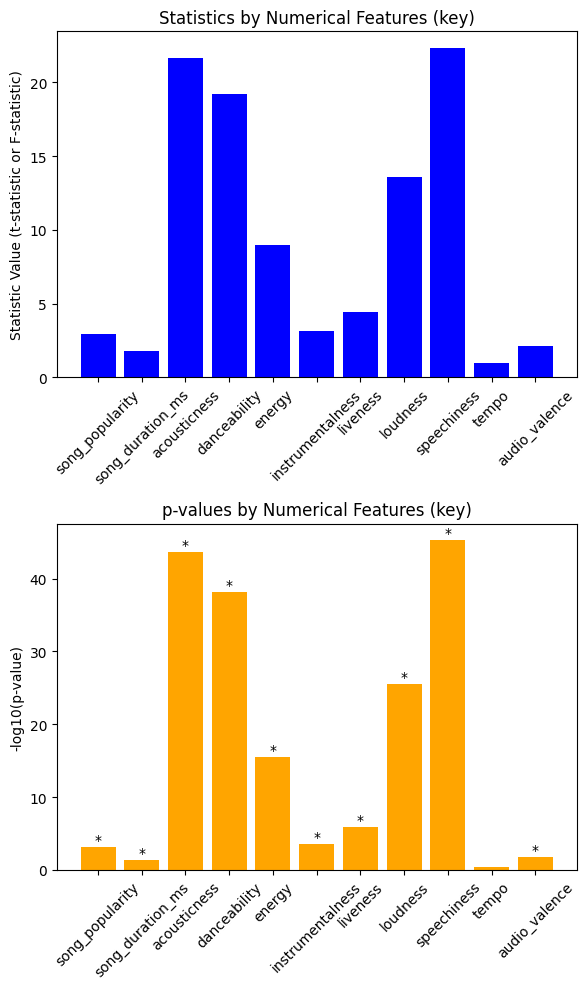

Significant numerical features for categorical feature 'audio_mode' (p < 0.05) are:
  song_duration_ms: p-value: 0.0006635239284011748, statistic: 3.4052
  acousticness: p-value: 1.0429644405521283e-13, statistic: -7.4439
  danceability: p-value: 2.649447034939559e-34, statistic: 12.2521
  energy: p-value: 9.350109441630333e-10, statistic: 6.1249
  instrumentalness: p-value: 0.023025605120346033, statistic: 2.2733
  loudness: p-value: 3.98929106842708e-12, statistic: 6.9446
  speechiness: p-value: 3.6327782728625506e-38, statistic: 12.9715
  tempo: p-value: 0.007121364529771229, statistic: -2.6916


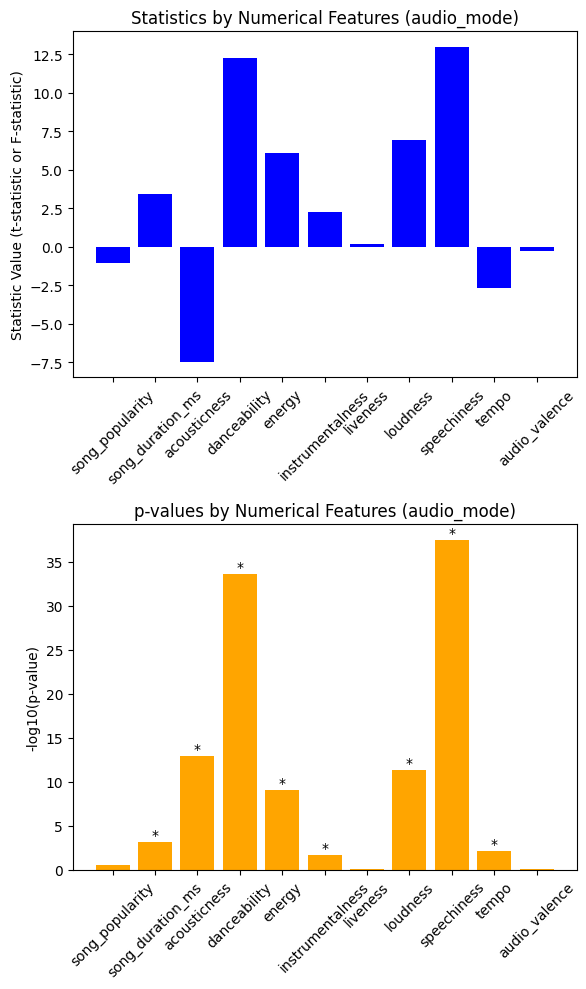

Significant numerical features for categorical feature 'time_signature' (p < 0.05) are:
  song_popularity: p-value: 0.03311115845144777, statistic: 2.6201
  song_duration_ms: p-value: 0.006677165217707779, statistic: 3.5520
  acousticness: p-value: 9.336674438442728e-140, statistic: 166.5594
  danceability: p-value: 1.0077163415101569e-130, statistic: 155.6767
  energy: p-value: 1.4883681970992263e-139, statistic: 166.3151
  instrumentalness: p-value: 1.0627761513496167e-28, statistic: 34.4836
  liveness: p-value: 0.0005986611199853573, statistic: 4.9031
  loudness: p-value: 4.6626062323462334e-85, statistic: 101.0790
  speechiness: p-value: 1.0093077396647454e-38, statistic: 46.2927
  tempo: p-value: 5.023493852044178e-10, statistic: 12.3478
  audio_valence: p-value: 6.256654339926294e-59, statistic: 70.1265


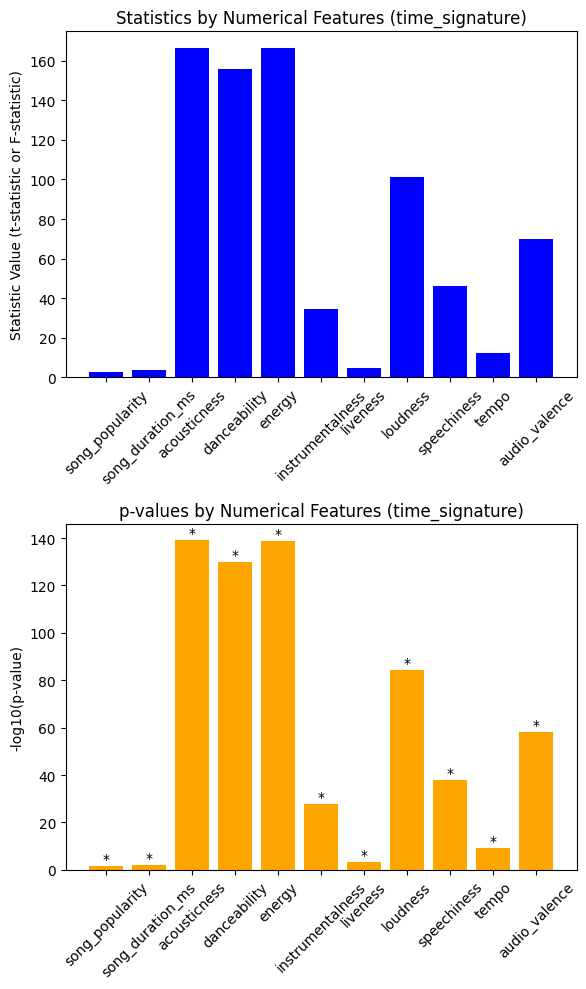

In [41]:
def test_main():
    """
    Perform t-tests and ANOVA tests on song data and plot the results.
    This function reads song data from a CSV file, removes duplicates, and drops the 'song_name' column.
    It then categorizes the features into categorical and numerical features. For each combination of 
    categorical and numerical features, it applies a t-test if the categorical feature has 2 unique values,
    otherwise, it applies an ANOVA test. Finally, it plots the results of these tests.
    The CSV file should be located at './data/song_data.csv'.
    The function performs the following steps:
    1. Reads the song data from a CSV file.
    2. Removes duplicate rows and drops the 'song_name' column.
    3. Identifies categorical and numerical features.
    4. Applies t-tests or ANOVA tests based on the number of unique values in the categorical features.
    5. Plots the results of the tests.
    Note:
    - The functions `t_test`, `anova_test`, and `plot_tests` should be defined elsewhere in the codebase.
    Returns:
    None
    """

    # Apply t-test and ANOVA for each combination
    song_raw = pd.read_csv("./data/song_data.csv")
    song_raw = song_raw.drop_duplicates().drop(columns=["song_name"])
#     print(song_raw.describe())

    # Features to plot against 'song_popularity'
    # features = song_raw.columns.drop('song_popularity')
    categorical_features = ["key", "audio_mode", "time_signature"]
    numerical_features = [col for col in song_raw.columns if col not in categorical_features]

    for cat_feature in categorical_features:
        for num_feature in numerical_features:
            if song_raw[cat_feature].nunique() == 2:
                t_test(song_raw, cat_feature, num_feature)
            else:
                anova_test(song_raw, cat_feature, num_feature)
                
    plot_tests(song_raw, categorical_features, numerical_features)
                
test_main()